# Weather Forecasting with Linear Regression
**Recitation by Dr. Duygu Ataman**

_02/16/2024, 09:30, 14:00 at Room 150_

_02/16/2024, 10:45, 13:30 Office Hours at Room 524 (For any follow-up questions)_

In these lab sessions, we will be using Jupyter notebooks running on Google Colab, which has most Python libraries installed.

Please find the folder together with the accompanying files here:
https://drive.google.com/drive/folders/1ovppuRW7qo6nagQxtqNTFMdZIhPKjidW?usp=share_link
and make a copy of the folder in your own Google Drive.

Please open the IPython notebook in the folder. This notebook aims to introduce linear regression models using PyTorch and pandas libraries in the weather forecasting application.

## Weather prediction

Being able to predict the weather had always been very appealing to scientists. Since the development of statistics as a scientific field many meteorologists have tried building sophisticated computational models that could make predictions about future meteorological events. Eventually, the studies of one meteorologist, Edward Lopez (1927), has concluded that there will always be a limit on how much we can predict about large-scale complex processes like the weather. His theory is also known as the **[Chaos Theory](https://en.wikipedia.org/wiki/Chaos_theory)** and have been studied ever since to understand how we can model complex dynamic systems.

## Loading and Representing Data Sets

In this recitation, we will implement a weather forecasting application with Python. We will use the weather recordings from New York City collected from [Open-Meteo](https://open-meteo.com/) between 2016 to 2022. You can find the data set in the column-separated file 'NYC_Weather_2016_2022.csv' in the Google Drive folder you had just copied and created.

We will start by allowing our application access to our local Google drives so files can be loaded into our Python programs.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


On the left-side menu in your Google Colab, find the Files symbol to access your Google Drive contents. Under _content/drive/MyDrive_ you will see all of your files and folders. Find the local copy to the recitation folder _Session3_, the data set _NYC_Weather_2016_2022.csv_ and copy the path by clicking on it on the right three-dot symbol and selecting **_Copy path_**. Inset the path in the read_csv function as string input.

A common library useful for data processing applications in Python is **pandas**. We will use the csv file reader method to load our file contents from the column-separated file into a **DataFrame**, a class type defined to store and handle operations with two-dimensional tabular data.

In [2]:
import pandas as pd
filename = "NYC_Weather_2016_2022.csv"
df = pd.read_csv(filename)
df.head(10)

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2016-01-01T00:00,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0
1,2016-01-01T01:00,7.5,0.0,0.0,20.0,4.0,0.0,56.0,9.8,287.0
2,2016-01-01T02:00,7.1,0.0,0.0,32.0,3.0,0.0,99.0,9.7,285.0
3,2016-01-01T03:00,6.6,0.0,0.0,35.0,5.0,0.0,100.0,9.2,281.0
4,2016-01-01T04:00,6.3,0.0,0.0,34.0,4.0,0.0,100.0,9.1,279.0
5,2016-01-01T05:00,6.1,0.0,0.0,35.0,5.0,0.0,100.0,9.4,277.0
6,2016-01-01T06:00,6.0,0.0,0.0,50.0,21.0,1.0,100.0,9.7,274.0
7,2016-01-01T07:00,5.9,0.0,0.0,51.0,24.0,0.0,98.0,9.7,272.0
8,2016-01-01T08:00,5.8,0.0,0.0,54.0,26.0,1.0,99.0,9.0,265.0
9,2016-01-01T09:00,5.8,0.0,0.0,58.0,31.0,1.0,99.0,10.2,262.0


The description of the attributes of the [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) class can be seen in the documentation. When we print the first 10 lines of the data stored in the **df** object that represents our csv file we see that it has 10 columns. The first column identifies each individual weather measurement using a timestamp recording the time of the measurement.

The rest of the 9 columns store different types of weather information that could be relevant to any meteorological analysis. Note that different sources might be recording different types and amount of measurements depending on the availability of measurement tools or the relevance to the specific application.

We could also use the built-in function _describe()_ to obtain an initial statistical summary of the data set, which will compute and display the count, mean, standard deviation, and minimum/maximum values for each of the columns, or the measurement types, in the DataFrame.

In [3]:
df.describe()

,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
count,59592.000000,59592.000000,59592.000000,59592.000000,59592.000000,59592.000000,59592.000000,59592.000000,59587.000000
mean,13.247721,0.133713,0.123401,45.448131,25.605702,30.109746,40.287203,11.379841,203.724420
std,9.804465,0.542782,0.525858,38.265304,37.161502,36.839594,42.526615,5.802103,99.719142
min,-18.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.200000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,7.200000,129.000000
50%,13.500000,0.000000,0.000000,35.000000,2.000000,10.000000,20.000000,10.400000,222.000000
75%,21.800000,0.000000,0.000000,89.000000,46.000000,58.000000,92.000000,14.500000,288.000000
max,35.500000,19.200000,19.200000,100.000000,100.000000,100.000000,100.000000,47.200000,360.000000


We can access the contents of each measurement using the **iloc** attribute which has indexing functionality.

For instance, we could extract the first ten temperature measurements as follows:

In [4]:
df.iloc[0:10, 1] # first time values of the first column

0    7.6
1    7.5
2    7.1
3    6.6
4    6.3
5    6.1
6    6.0
7    5.9
8    5.8
9    5.8
Name: temperature_2m (°C), dtype: float64

Let's inspect visually how the individual measurements from New York City weather are distributed through the six years of collection.

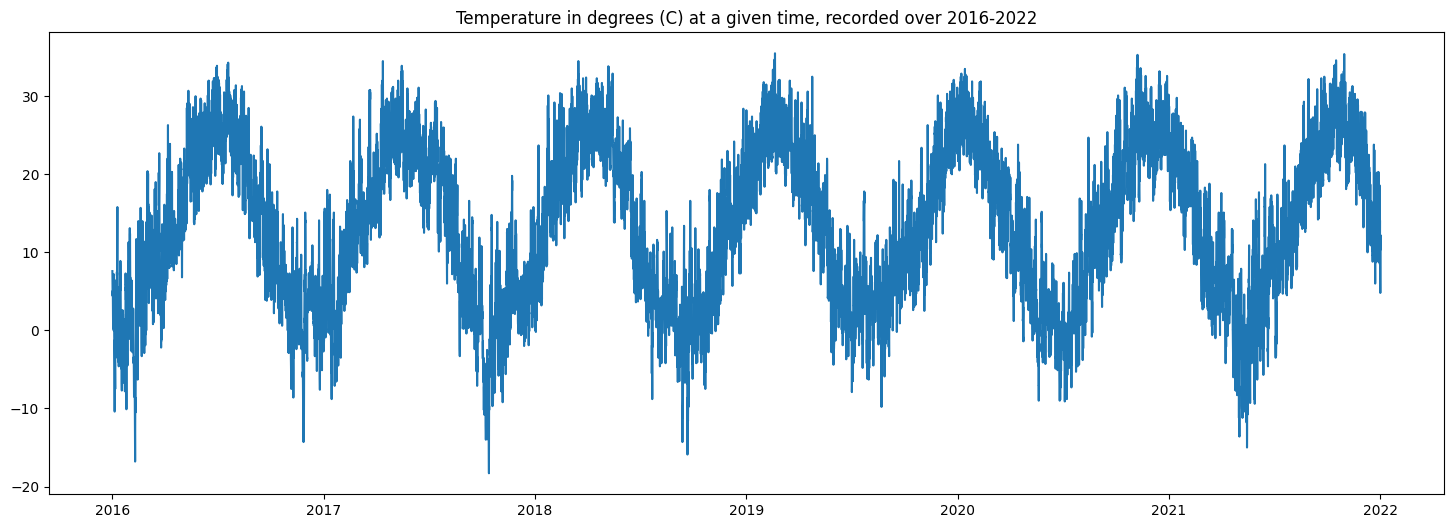

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

df['temperature_2m (°C)'].plot()
plt.title('Temperature in degrees (C) at a given time, recorded over 2016-2022')
plt.xticks([59592/6*i for i in range(7)], ['2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.show()

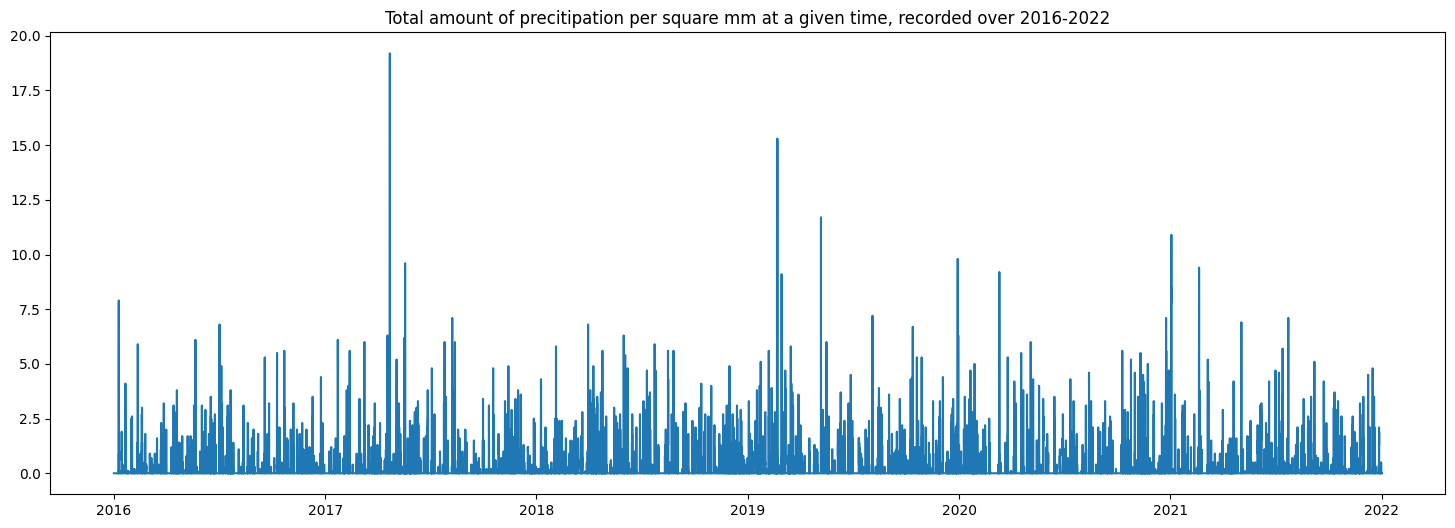

In [6]:
plt.figure(figsize=(18, 6))

df['precipitation (mm)'].plot()
plt.title('Total amount of precitipation per square mm at a given time, recorded over 2016-2022')
plt.xticks([59592/6*i for i in range(7)], ['2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.show()

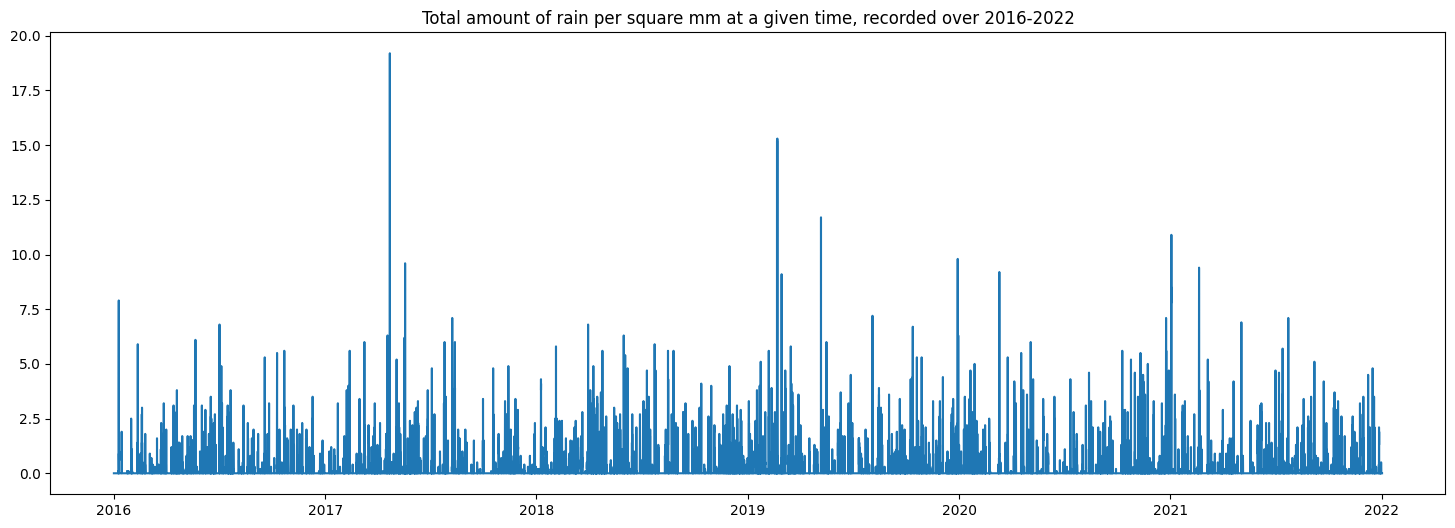

In [7]:
plt.figure(figsize=(18, 6))

df['rain (mm)'].plot()
plt.title('Total amount of rain per square mm at a given time, recorded over 2016-2022')
plt.xticks([59592/6*i for i in range(7)], ['2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.show()

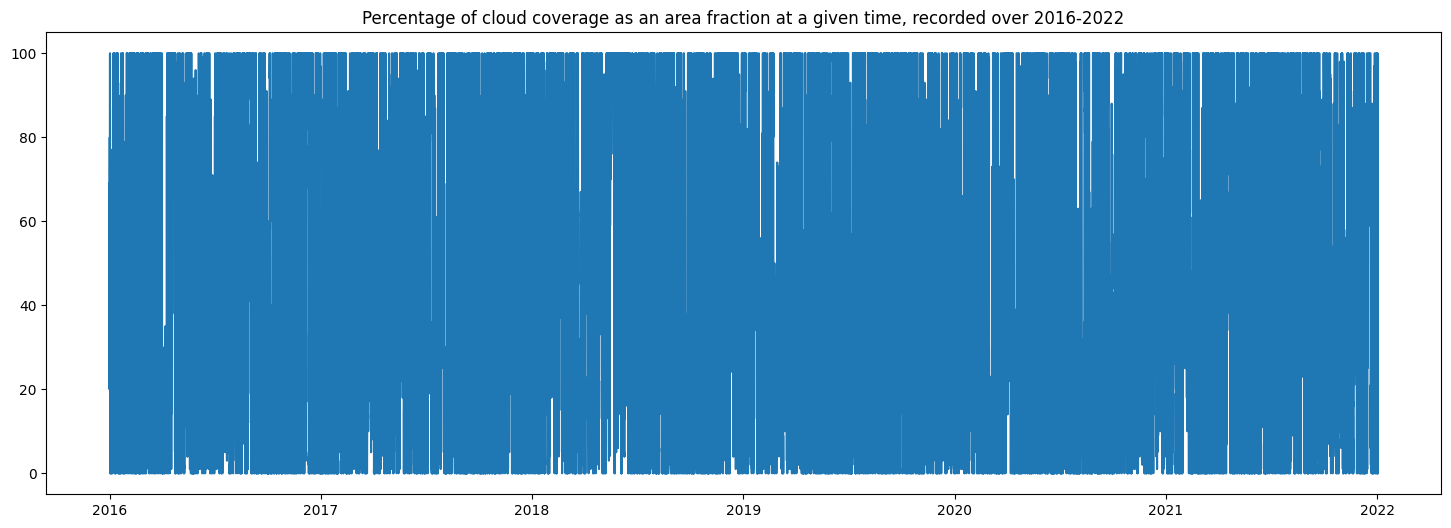

In [9]:
plt.figure(figsize=(18, 6))
# not easy to see the fluctuations, prob need to work with scale, range
df['cloudcover (%)'].plot()
plt.title('Percentage of cloud coverage as an area fraction at a given time, recorded over 2016-2022')
plt.xticks([59592/6*i for i in range(7)], ['2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.show()

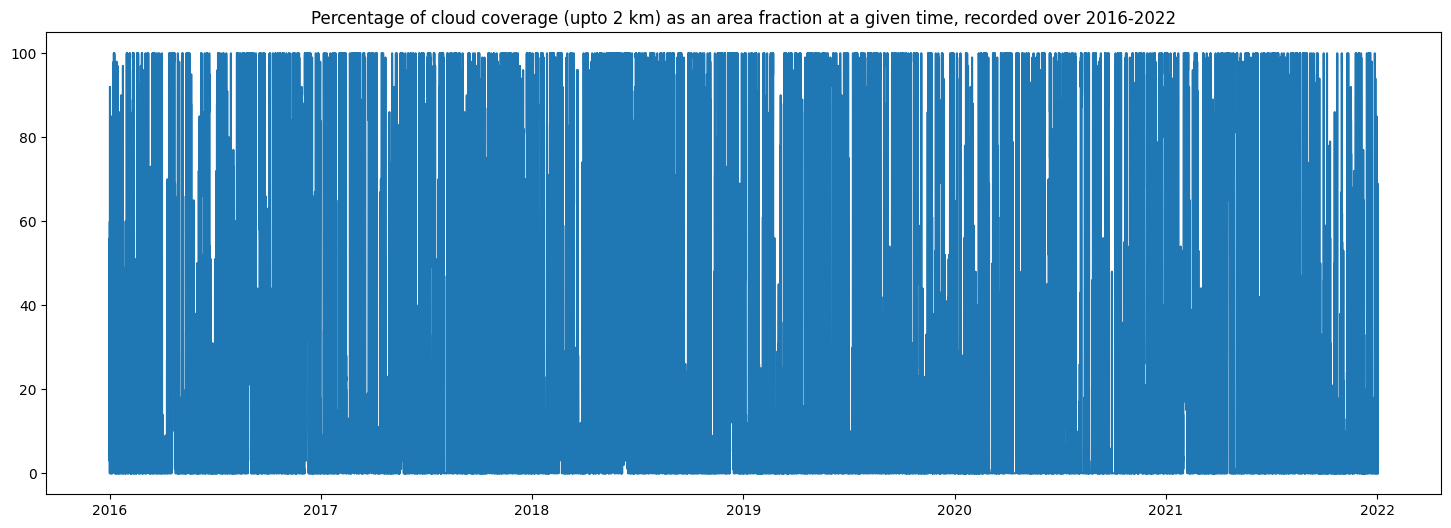

In [10]:
plt.figure(figsize=(18, 6))

df['cloudcover_low (%)'].plot()
plt.title('Percentage of cloud coverage (upto 2 km) as an area fraction at a given time, recorded over 2016-2022')
plt.xticks([59592/6*i for i in range(7)], ['2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.show()

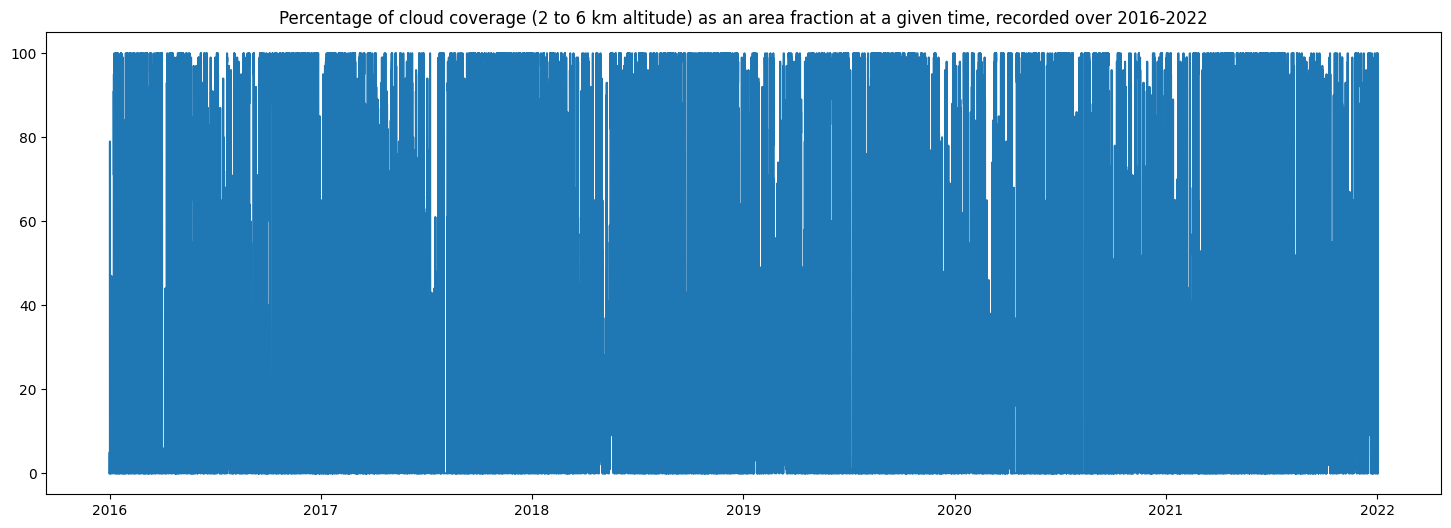

In [11]:
plt.figure(figsize=(18, 6))

df['cloudcover_mid (%)'].plot()
plt.title('Percentage of cloud coverage (2 to 6 km altitude) as an area fraction at a given time, recorded over 2016-2022')
plt.xticks([59592/6*i for i in range(7)], ['2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.show()

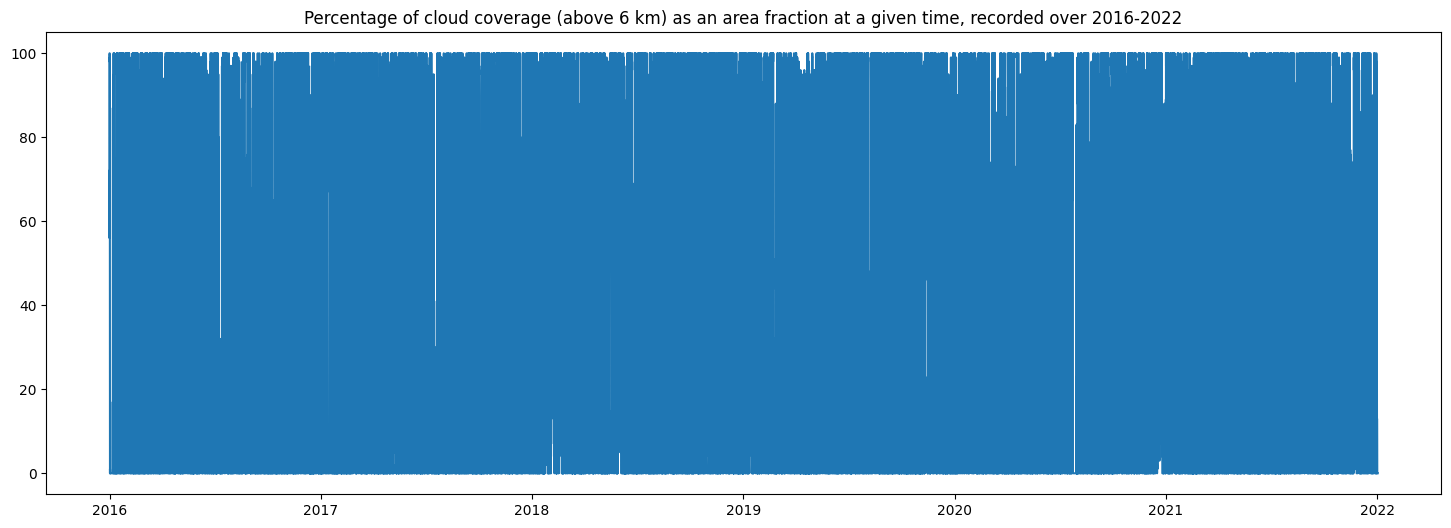

In [12]:
plt.figure(figsize=(18, 6))

df['cloudcover_high (%)'].plot()
plt.title('Percentage of cloud coverage (above 6 km) as an area fraction at a given time, recorded over 2016-2022')
plt.xticks([59592/6*i for i in range(7)], ['2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.show()

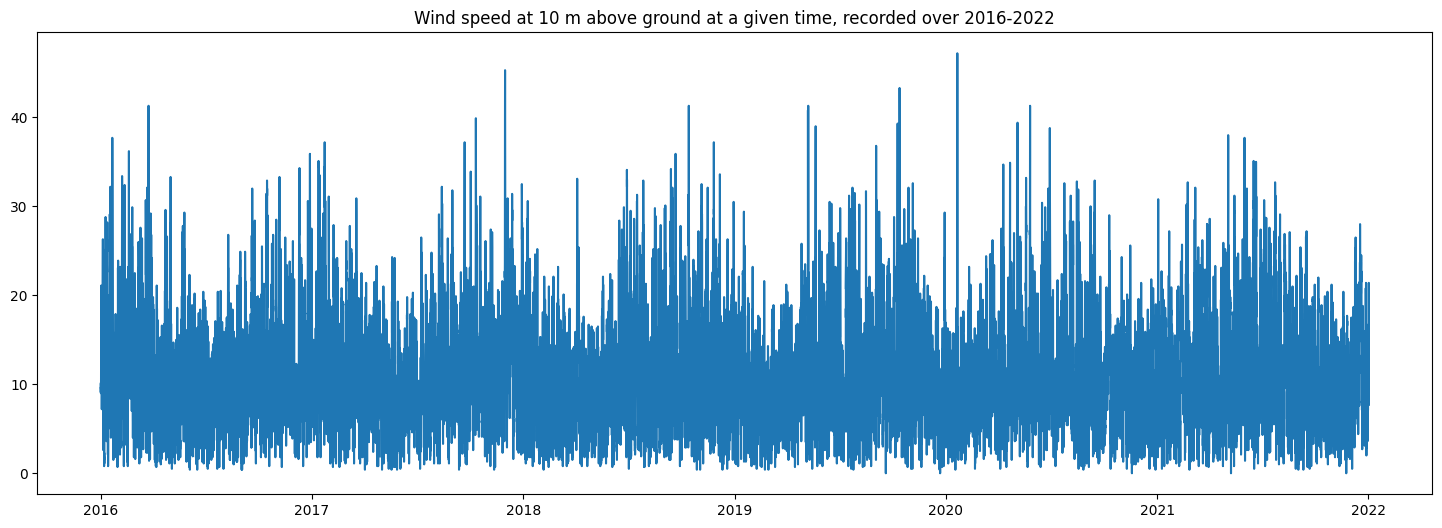

In [13]:
plt.figure(figsize=(18, 6))

df['windspeed_10m (km/h)'].plot()
plt.title('Wind speed at 10 m above ground at a given time, recorded over 2016-2022')
plt.xticks([59592/6*i for i in range(7)], ['2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.show()

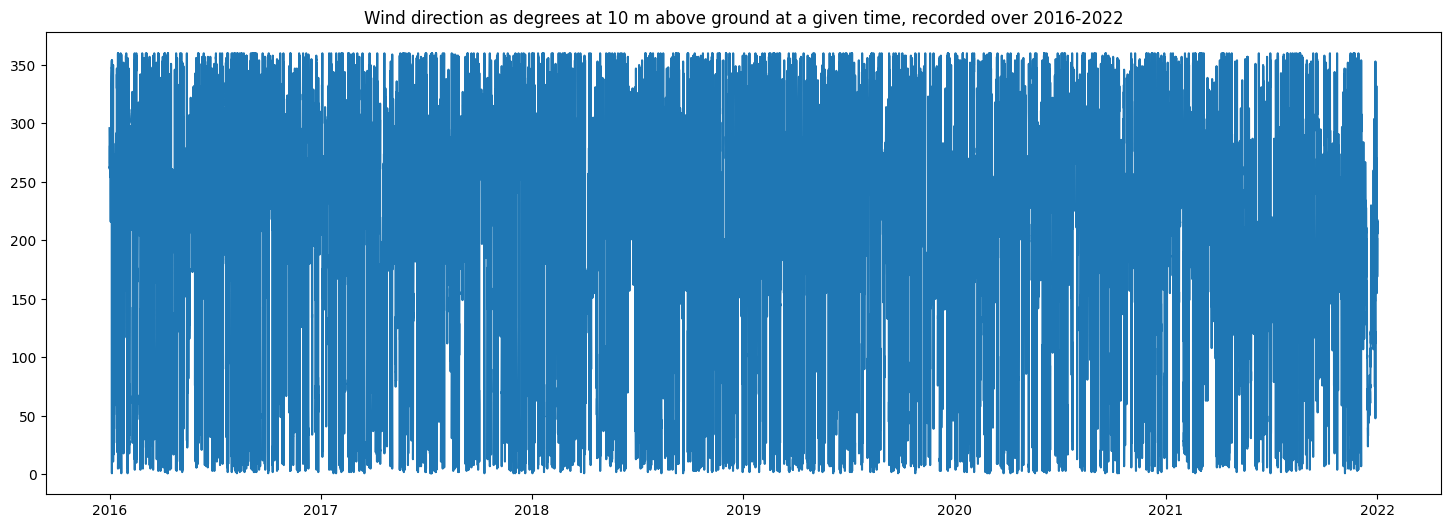

In [14]:
plt.figure(figsize=(18, 6))

df['winddirection_10m (°)'].plot()
plt.title('Wind direction as degrees at 10 m above ground at a given time, recorded over 2016-2022')
plt.xticks([59592/6*i for i in range(7)], ['2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.show()

## Rain prediction with linear regression

If we wanted to try to make predictions on the probability of observing rain at a given day and time, we could use these measurement data to build a prediction model. Here, any of the remaining measurements could be used to see if they could be potential indicators of observing rain.

Let's see how each individual meteorological feature has a relationship with the rain data.

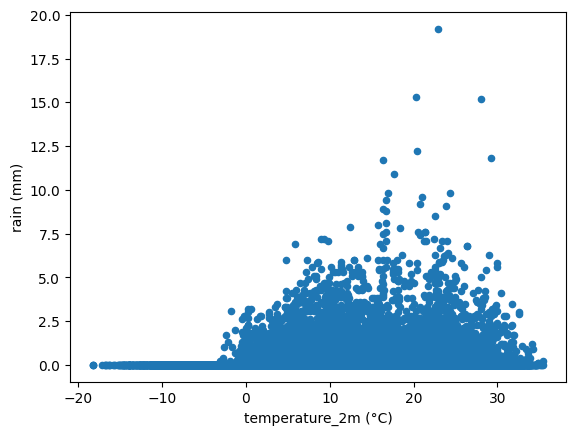

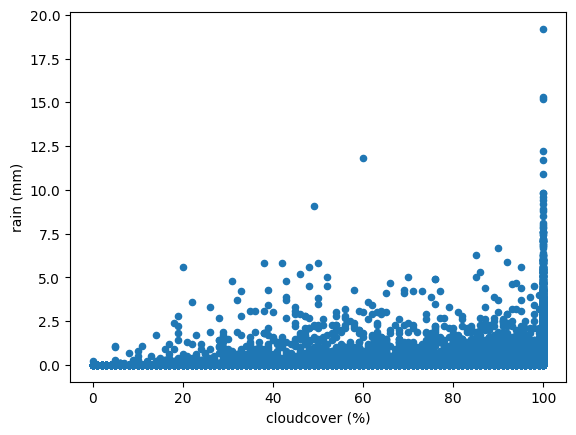

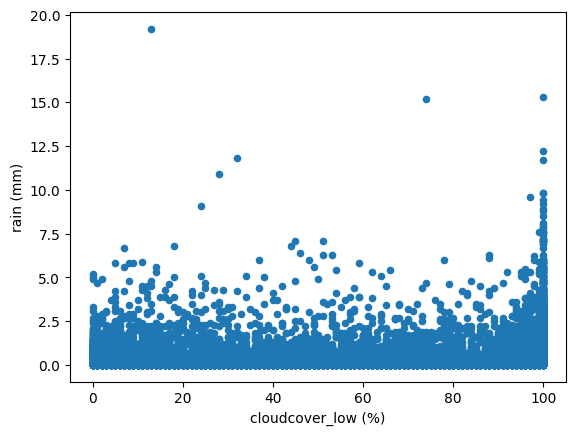

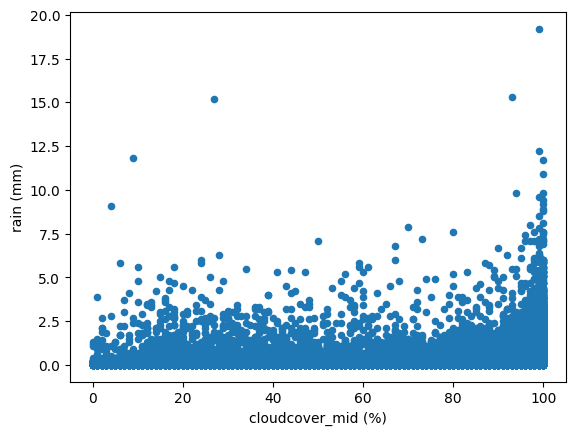

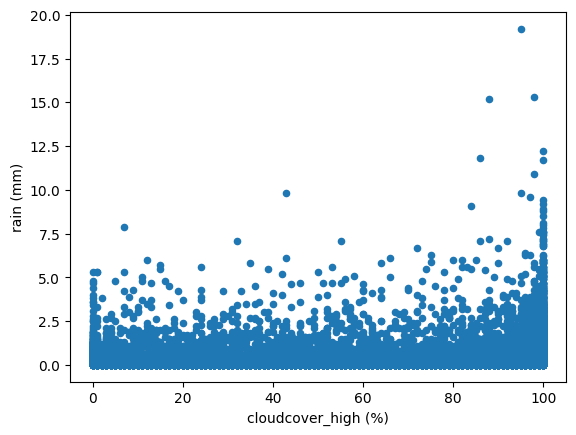

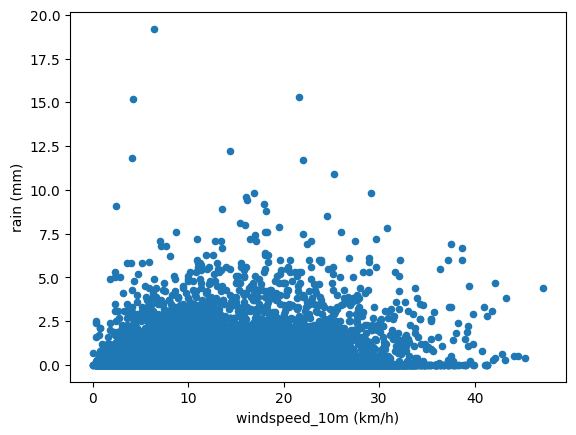

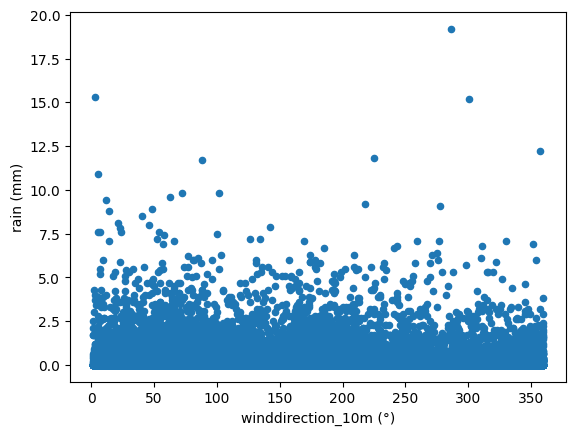

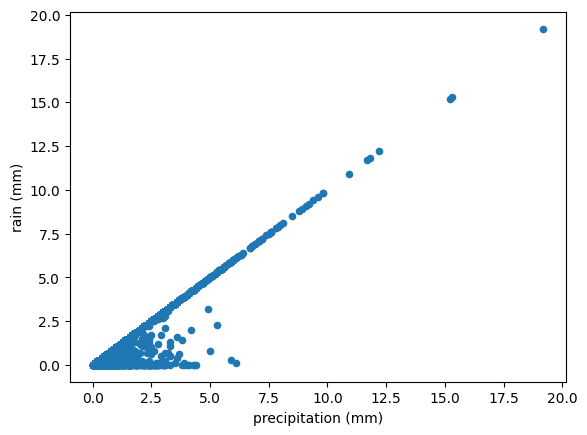

In [15]:
import matplotlib.pyplot as plt

axs1 = df.plot.scatter(x='temperature_2m (°C)', y='rain (mm)')
axs2 = df.plot.scatter(x='cloudcover (%)', y='rain (mm)')
axs3 = df.plot.scatter(x='cloudcover_low (%)', y='rain (mm)')
axs4 = df.plot.scatter(x='cloudcover_mid (%)', y='rain (mm)')
axs5 = df.plot.scatter(x='cloudcover_high (%)', y='rain (mm)')
axs6 = df.plot.scatter(x='windspeed_10m (km/h)', y='rain (mm)')
axs7 = df.plot.scatter(x='winddirection_10m (°)', y='rain (mm)')
axs8 = df.plot.scatter(x='precipitation (mm)', y='rain (mm)')

The development of any machine learning model requires a basis to evaluate the accuracy of the model performance. In order to assess whether the built model is useful for the target application, we always divide parts of our data set into separate parts: **training** set contains the examples the model will learn from, and during training the ongoing improvement in accuracy can be validated in the **validation** set. The final predictions must always be conducted on a separate **testing** set, which will present unseen examples to the model to make predictions on such that we can evaluate how well the model has learnt to use its knowledge to generalize into varying new information in realistic application scenarios.

We start manipulating our data set by cleaning and filtering operations to ensure each learning example is as clean and representative as possible. In order to create representative examples from different dates and times, we randomly sample portions from our data set to form training and testing sets.

In [17]:
import torch
import pdb

df = df.dropna() # first filter out any empty rows and columns in the dataset
datatensor = torch.tensor(df.values[1:,1::].astype(float)) # We can remove the first row and column since it contains non-numeric data

# apply normalization techniques
datatensor = torch.nn.functional.normalize(datatensor)
print(datatensor)
# pdb.set_trace()

# randomly select 80% of the examples and store in the training set for teaching the model
# remaining 20% will be used for evaluating the predictions
train, test = torch.utils.data.random_split(datatensor, [0.8, 0.2])
traindata = torch.stack([t for t in train])
testdata = torch.stack([t for t in test])

tensor([[0.0256, 0.0000, 0.0000,  ..., 0.1909, 0.0334, 0.9782],
        [0.0234, 0.0000, 0.0000,  ..., 0.3260, 0.0319, 0.9386],
        [0.0220, 0.0000, 0.0000,  ..., 0.3327, 0.0306, 0.9349],
        ...,
        [0.0531, 0.0000, 0.0000,  ..., 0.0000, 0.0723, 0.9013],
        [0.0537, 0.0000, 0.0000,  ..., 0.0000, 0.0522, 0.9966],
        [0.0478, 0.0000, 0.0000,  ..., 0.0000, 0.0354, 0.9982]],
       dtype=torch.float64)


Let's start our program by defining the linear regression model. We will use the [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layer implementation in PyTorch which will automatically create a module containing model parameters, including the linear projection matrix $A$ and an addition bias $b$.

In [18]:
import torch

class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize) # a default Linear projection layer with weights A and bias B s.t. y = A*x + b

    def forward(self, x):
        y = self.linear(x)
        return y

Next, we will define how the model will be trained on the selected prediction task. Our model will use the training data to learn from. In order to measure how model outputs compare to the target (or correct) predictions we need to define a distance metric that computes the differences between the predicted and correct rain values. We can use the mean squared error function to define our loss function.

In [19]:
loss = torch.nn.MSELoss()

The data we will use to represent the learning examples, i.e. training set, will contain all 9 measurements that could aid the prediction objective, or the regression task. The prediction measurement, rain values, will be the target data and will represent the correct output. Here, we use the sampled training collection of rain data as target examples of correct prediction, and use the remaining as test set to evaluate model performance.


In [20]:
# We can create separate tensors to input and output to the model
train_in = torch.cat([traindata[:,0:2], traindata[:,3::]], dim=1)
test_in = torch.cat([testdata[:,0:2], testdata[:,3::]], dim=1)

train_out = traindata[:,2].unsqueeze(1)
test_out = testdata[:,2].unsqueeze(1)

# Check if the final data includes any of the rain measurements
print(train_in[1,:])
print(test_in[1,:])

print(traindata.shape)
print(testdata.shape)
print(traindata[1,:])
print(testdata[1,:])

print(train_in.shape)
print(test_in.shape)
print(train_out.shape)
print(test_out.shape)

tensor([0.0017, 0.0000, 0.3569, 0.0000, 0.4079, 0.3739, 0.0259, 0.7521],
       dtype=torch.float64)
tensor([0.0317, 0.0171, 0.4176, 0.4176, 0.4176, 0.4176, 0.0781, 0.5429],
       dtype=torch.float64)
torch.Size([47669, 9])
torch.Size([11917, 9])
tensor([0.0017, 0.0000, 0.0000, 0.3569, 0.0000, 0.4079, 0.3739, 0.0259, 0.7521],
       dtype=torch.float64)
tensor([0.0317, 0.0171, 0.0171, 0.4176, 0.4176, 0.4176, 0.4176, 0.0781, 0.5429],
       dtype=torch.float64)
torch.Size([47669, 8])
torch.Size([11917, 8])
torch.Size([47669, 1])
torch.Size([11917, 1])




A typical machine learning training cycle is implemented with **batch** processing, which passes multiple inputs and receives multiple outputs simultaneously to the model. The size of the batch, represented at batch time, will determine the intervals at which gradient accumulation will be computed. Each time, **batch size** examples are used together to evaluate a joint gradient, and afterwards the model parameters are updated after the outputs of all examples in the batch are generated.

PyTorch allows automatic batch creation through the Dataset class. Here we will modify the base class to implement our own data set representation.

In [21]:
from torch.utils.data import Dataset, DataLoader

# grading descent

class WeatherDataset(Dataset):
  def __init__(self, train_in, train_out):
        # Initialize data
        self.n_samples = train_in.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = train_in # size [n_samples, n_features]
        self.y_data = train_out # size [n_samples, 1]

  # support indexing such that dataset[i] can be used to get i-th sample
  def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

  # we can call len(dataset) to return the size
  def __len__(self):
      return self.n_samples


trainingData = WeatherDataset(train_in, train_out)

We can now implement the model training and testing in our program. We will define our model with its size parameters for the input and output, and create an iterative loop for optimizing the model parameters using each training example and the [Stochastic Gradient Descent](https://pytorch.org/docs/stable/optim.html) optimizer. Another important parameter is the **learning rate** which determines the scale at which each parameter update will be performed by the optimizer. The optimizer will continue the training process until a preset criterion or number of steps are reached.

In [30]:
def train(learning_rate, steps, batch_size):
  model = LinearRegression(inputSize=8, outputSize=1)
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  # the order of showing data to the model matters in our case --> shuffle = False
  loader = iter(DataLoader(dataset=trainingData, batch_size=batch_size, shuffle=False)) 

  losses = []; step = 0

  while(1):
    input, target = next(loader)
    optimizer.zero_grad() # reset gradiant value to zero
    model.double()
    output = model(input) # pass input to model
    err = loss(output, target) # compute mean squared error between model prediction and target value
    losses.append(err) # store err value to monitor training
    # evaluate the gradient at the end of the computational graph

    err.backward()

    # propagate the evaluated gradient to update model parameters
    optimizer.step()

    print('step {}, loss {}'.format(step, err.item()))

    step += 1
    # Set stopping criterion
    if len(losses) >= steps:
      break
  return model, losses

learning_rate = 0.05
steps = 100
batch_size = 128
model, losses = train(learning_rate, steps, batch_size)

step 0, loss 0.024681393773025938
step 1, loss 0.01907064931386083
step 2, loss 0.012224873136386288
step 3, loss 0.009373480833182232
step 4, loss 0.006881735738376504
step 5, loss 0.004852901791795455
step 6, loss 0.0032047190399999764
step 7, loss 0.004413831724500917
step 8, loss 0.002584024237031856
step 9, loss 0.002268010758932109
step 10, loss 0.0022555605218477753
step 11, loss 0.0018098944461356382
step 12, loss 0.0012255158099873883
step 13, loss 0.0018882479147605924
step 14, loss 0.0012279240528366778
step 15, loss 0.0015299299767024895
step 16, loss 0.0018365007180360126
step 17, loss 0.001309490924036982
step 18, loss 0.001786122936319046
step 19, loss 0.0017090662984178776
step 20, loss 0.0012273277271337803
step 21, loss 0.0015730567043370548
step 22, loss 0.0018638589119045475
step 23, loss 0.0012146739586579433
step 24, loss 0.0016872244756601104
step 25, loss 0.0008899449576858763
step 26, loss 0.000942899349959035
step 27, loss 0.001777542407957432
step 28, loss 0.

Text(0, 0.5, 'Loss')

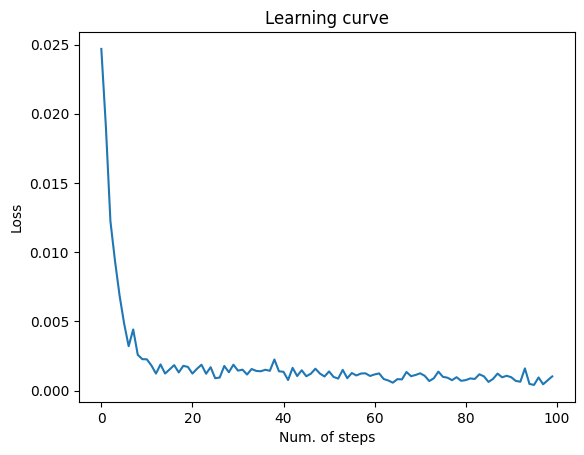

In [31]:
import matplotlib.pyplot as plt

plt.plot(range(steps), torch.stack(losses).detach())
plt.title('Learning curve')
plt.xlabel('Num. of steps')
plt.ylabel('Loss')

When the loss minimization is complete, we can now use the learned model parameters for the actual prediction task. We will use the testing features as input to the model and compare the model output with the actual rain measurements.

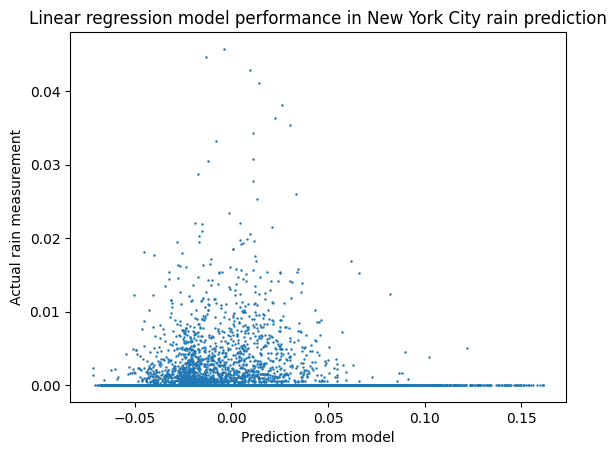

In [32]:
with torch.no_grad(): # this signal informs torch that further operations will not need the gradient computation
  predictions = model(test_in)
  plt.xlabel('Prediction from model')
  plt.ylabel('Actual rain measurement')
  plt.title('Linear regression model performance in New York City rain prediction')


plt.plot(predictions, test_out, 'o', markersize=.75)

## Exercise 1

Using the provided example, plot 9 different plots for the model learning curves by ranging the batchsize in range $\{32, 64, 128\}$, and the learning rate in range $\{0.005, 0.01, 0.05\}$. At each time, observe and comment on how the change of hyperparameter affects different properties of the learning curve (e.g. the shape, the smoothness or sharpness).

**Note**: You are encouraged to combine the portions of the code to create your own version before obtaining the plots.

step 0, loss 0.0641838218444758
step 1, loss 0.05856608324045283
step 2, loss 0.05204824782234274
step 3, loss 0.05436329414165746
step 4, loss 0.059669894849697896
step 5, loss 0.05853278487643851
step 6, loss 0.058029987613358605
step 7, loss 0.055916837515100584
step 8, loss 0.0557362151150352
step 9, loss 0.053773790191654805
step 10, loss 0.04515409759644588
step 11, loss 0.043629093424309276
step 12, loss 0.046109452976660456
step 13, loss 0.04155164648047362
step 14, loss 0.04576724477232763
step 15, loss 0.03541132605844148
step 16, loss 0.032495649038899926
step 17, loss 0.03803484017199209
step 18, loss 0.041566253246273804
step 19, loss 0.030115427408884097
step 20, loss 0.0417911120110999
step 21, loss 0.032559664577191956
step 22, loss 0.03528299377739412
step 23, loss 0.031006958917207388
step 24, loss 0.027630439843399433
step 25, loss 0.02824634655615079
step 26, loss 0.03236351156299211
step 27, loss 0.025970889079596174
step 28, loss 0.02787563642326807
step 29, loss 

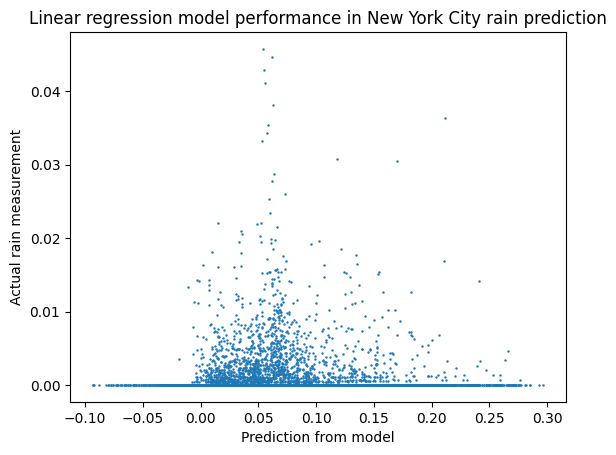

In [36]:
## Your solution ##

learning_rate = 0.005
steps = 100
batch_size = 32
model, losses = train(learning_rate, steps, batch_size)


with torch.no_grad(): # this signal informs torch that further operations will not need the gradient computation
  predictions = model(test_in)
  plt.xlabel('Prediction from model')
  plt.ylabel('Actual rain measurement')
  plt.title('Linear regression model performance in New York City rain prediction')


plt.plot(predictions, test_out, 'o', markersize=.75)

step 0, loss 0.041114410112746635
step 1, loss 0.029413174771307244
step 2, loss 0.030474713533259125
step 3, loss 0.03096385394275479
step 4, loss 0.03570222881274864
step 5, loss 0.030710459262145818
step 6, loss 0.0315528102391294
step 7, loss 0.02547912997869709
step 8, loss 0.023712139108528894
step 9, loss 0.025104047618129784
step 10, loss 0.02398202613630529
step 11, loss 0.017322627349855013
step 12, loss 0.029252712478589217
step 13, loss 0.022981859822310866
step 14, loss 0.024388207511787458
step 15, loss 0.017369129826563592
step 16, loss 0.0223350552763377
step 17, loss 0.02125396168256804
step 18, loss 0.01691031432562194
step 19, loss 0.017549680538901907
step 20, loss 0.016412668836133057
step 21, loss 0.025451428859165015
step 22, loss 0.018085544627893572
step 23, loss 0.014179259478774821
step 24, loss 0.015205728151148665
step 25, loss 0.011539522423090342
step 26, loss 0.01158738806099946
step 27, loss 0.012282263396118823
step 28, loss 0.011619480414242583
step 2

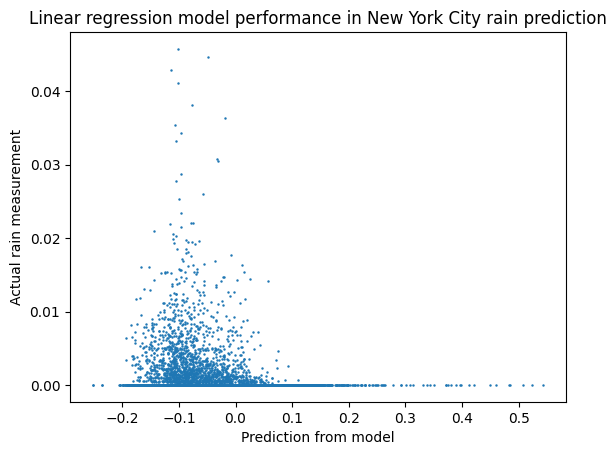

In [35]:
## Your solution ##

learning_rate = 0.01
steps = 100
batch_size = 64
model, losses = train(learning_rate, steps, batch_size)


with torch.no_grad(): # this signal informs torch that further operations will not need the gradient computation
  predictions = model(test_in)
  plt.xlabel('Prediction from model')
  plt.ylabel('Actual rain measurement')
  plt.title('Linear regression model performance in New York City rain prediction')


plt.plot(predictions, test_out, 'o', markersize=.75)

step 0, loss 0.0026906716350505386
step 1, loss 0.0021679895462872905
step 2, loss 0.0022081818064767053
step 3, loss 0.0023953226300244676
step 4, loss 0.0023551215207014285
step 5, loss 0.0021840213781897638
step 6, loss 0.0019187921234167658
step 7, loss 0.0027450052360628425
step 8, loss 0.0022739719858680483
step 9, loss 0.0015657159726077592
step 10, loss 0.0022051732312233555
step 11, loss 0.0020244158164362536
step 12, loss 0.0014950257828506093
step 13, loss 0.0015085443773029375
step 14, loss 0.0014708502403422527
step 15, loss 0.0017422446973372387
step 16, loss 0.0019338728776233292
step 17, loss 0.0013946773284160816
step 18, loss 0.0016787687529476914
step 19, loss 0.0017494556521141888
step 20, loss 0.0013272719104863448
step 21, loss 0.0018538742459594316
step 22, loss 0.0015466130562876044
step 23, loss 0.0015856953113747526
step 24, loss 0.0016115262387182046
step 25, loss 0.0014970550103465883
step 26, loss 0.0014829019750409146
step 27, loss 0.0015910462882360403
st

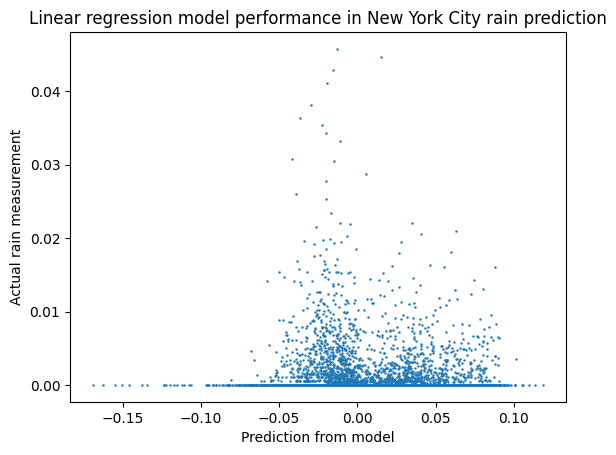

In [39]:
## Your solution ##

learning_rate = 0.05
steps = 100
batch_size = 128
model, losses = train(learning_rate, steps, batch_size)


with torch.no_grad(): # this signal informs torch that further operations will not need the gradient computation
  predictions = model(test_in)
  plt.xlabel('Prediction from model')
  plt.ylabel('Actual rain measurement')
  plt.title('Linear regression model performance in New York City rain prediction')


plt.plot(predictions, test_out, 'o', markersize=.75)

## Exercise 2

Implement a Python application for rain prediction in New York City using the data set and provided functions for data processing and linear regression which uses the mean absolute error as the loss function. You may use any PyTorch functions.

Mean absolute error is defined as:

$$
 MAE(x, y) = \frac{1}{n} \sum_{i=1}^n |y_i - x_i|
$$

Plot the prediction vs. actual rain measurement plots for the different models.

**Note**: Each model might have different hypermaparameters optimal for their convergence. You can use the variables $learning_rate$ and $steps$ which are inputs to the training function to tune the optimal training hyperparameters of your regression model.

In [37]:
## Your solution ##
def compute_mae(learning_rate, batch_size, input, target):
    mae = torch.nn.L1Loss()
    output1 = mae(input, target)
    print("MAE loss for learning rate: {} and batch size: {}: ".format(learning_rate, batch_size), output)